In [1]:
# Importing libraries
import numpy as np
import pandas as pd

In [2]:
# Loading Files
df = pd.read_csv("/home/shaun/Desktop/Work/Sem1/6006CEM_ML/CW/Datasets/BreastCancer.csv") 

In [3]:
# Pre-process the dataset
df.drop(['id','Unnamed: 32'], axis=1, inplace=True)  # Removing columns of which hold uneccecary or null data
diagnosis=pd.get_dummies(df['diagnosis'],drop_first=True) # From this column, we create a seperate column to represent the data with 1 and 0
df = pd.concat([df,diagnosis], axis=1)  # Add the new diagnosis collumn to the end of the dataset and remove the old column
df.drop(['diagnosis'], axis=1, inplace=True) 
#df.info()

In [4]:
# Setting values for X and y
X = df.iloc[:,:-1].values  # set the x values to the first 30 collumns
y = df.iloc[:,-1:].values  # set the y values to the last collumn only
#print(X.shape)

In [5]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25, random_state = 0)
# Scale the data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

In [6]:
# Apply the Neural Netwrok learning model and train it
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(max_iter=10000)
model.fit(X_train_scaled,y_train)

/home/shaun/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


MLPClassifier(max_iter=10000)

In [7]:
# Get predictions
y_train_pred = model.predict(X_train_scaled)  # compare the training data with the test data
y_test_pred = model.predict(X_test_scaled)

In [8]:
# Evaluate the model
print("Train score = {:0.3f}".format(model.score(X_train_scaled, y_train)))
print("Test score = {:0.3f}".format(model.score(X_test_scaled, y_test)))

from sklearn.metrics import classification_report
target_names = ['Malignant','benign']
print(classification_report(y_test,y_test_pred, target_names=target_names))

Train score = 0.998
Test score = 0.944
              precision    recall  f1-score   support

   Malignant       0.97      0.94      0.96        90
      benign       0.91      0.94      0.93        53

    accuracy                           0.94       143
   macro avg       0.94      0.94      0.94       143
weighted avg       0.94      0.94      0.94       143



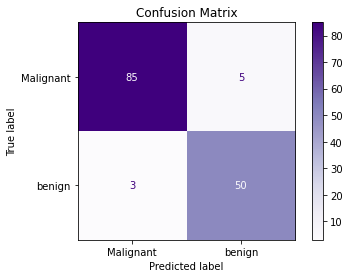

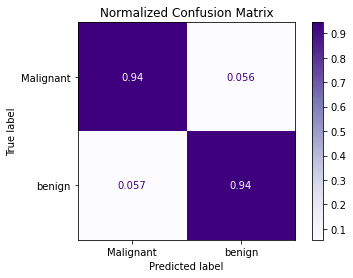

In [9]:
# Plot confusion matricies
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

titles_options = [('Confusion Matrix', None),
                 ('Normalized Confusion Matrix', 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test_scaled, y_test,
                                display_labels=['Malignant', 'benign'],
                                cmap=plt.cm.Purples,
                                normalize=normalize)
    disp.ax_.set_title(title) 
    #print(title)
    #print(disp.confusion_matrix)
    
plt.show()